In [62]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
growth = pd.read_csv("growth_usa.csv")

In [3]:
growth.head()

,Time,life-expectancy,population,unemployment-rate,GNI
0,1970,70.807317,205052000,4.9,5.284965e+12
1,1971,71.107317,207661000,5.9,5.462059e+12
2,1972,71.156098,209896000,5.6,5.750188e+12
3,1973,71.356098,211909000,4.9,6.087866e+12
4,1974,71.956098,213854000,5.6,6.061727e+12


<Axes: xlabel='GNI', ylabel='life-expectancy'>

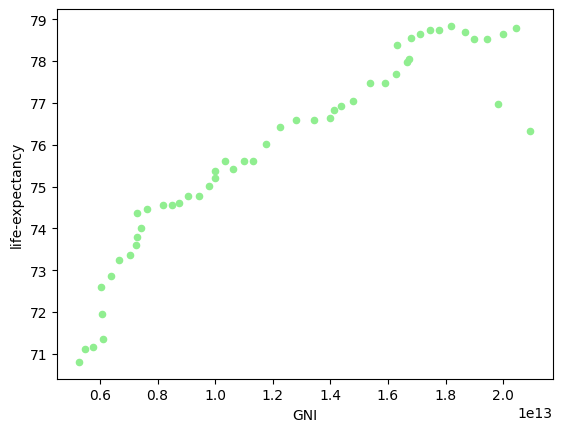

In [4]:
growth.plot(x="GNI", y="life-expectancy", kind="scatter", color="lightgreen")

In [5]:
model = LinearRegression()
model.fit(growth["GNI"].values.reshape(-1, 1), growth["life-expectancy"])

LinearRegression()

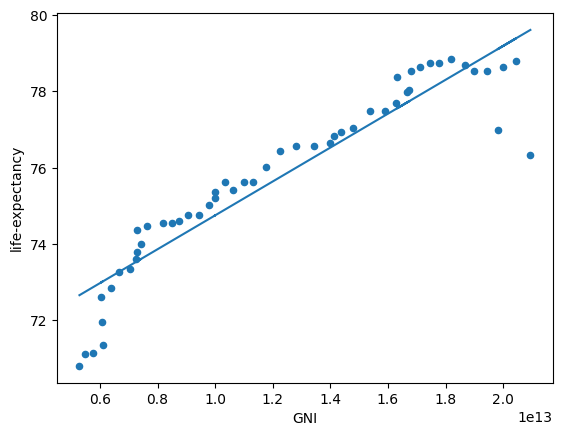

In [6]:
growth.plot(x="GNI", y="life-expectancy", kind="scatter")
plt.plot(growth["GNI"].values.reshape(-1,1), model.predict(growth["GNI"].values.reshape(-1,1)))

Ergebnis: Daten nicht über lineare Regression interpretierbar (Start-x-Werte werden außer Acht gelassen)!!!

In [7]:
from statsmodels.formula.api import ols

In [8]:
growth["lifeexpectancy"] = growth["life-expectancy"]

In [9]:
model = ols("lifeexpectancy ~ GNI", data = growth).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         lifeexpectancy   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     312.4
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           3.77e-23
Time:                        13:24:37   Log-Likelihood:                -65.528
No. Observations:                  52   AIC:                             135.1
Df Residuals:                      50   BIC:                             139.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.3154      0.331    212.218      0.000      69.650      70.981
GNI         4.438e-13   2.51e-14     17.674      0.000    3.93e-13    4.94e-13
==============================================================================
Omnibus:                       30.736   Durbin-Watson:                   0.165
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.913
Skew:                          -1.913   Prob(JB):                     4.38e-13
Kurtosis:                       6.410   Cond. No.                     3.62e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.62e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
import numpy as np

In [11]:
log_growth = np.log(growth)

In [12]:
xlog = np.log(growth["GNI"])
ylog = np.log(growth["lifeexpectancy"])

In [13]:
log_growth(x="GNI", y="lifeexpectancy", kind="scatter")
plt.show()

TypeError: 'DataFrame' object is not callable

In [14]:
model2 = LinearRegression()
model2.fit(log_growth["GNI"].values.reshape(-1, 1), log_growth["life-expectancy"])

LinearRegression()

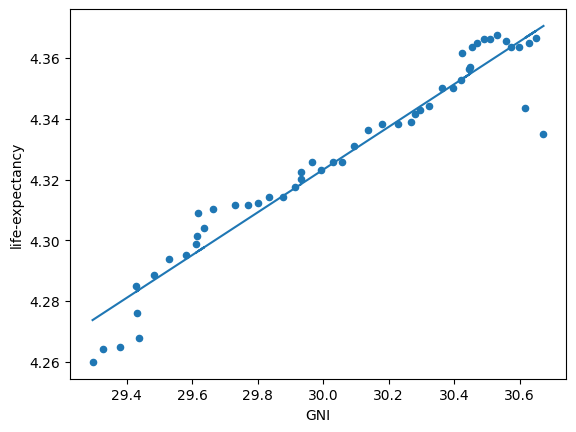

In [15]:
log_growth.plot(x="GNI", y="life-expectancy", kind="scatter")
plt.plot(log_growth["GNI"].values.reshape(-1,1), model2.predict(log_growth["GNI"].values.reshape(-1,1)))
plt.show()

In [16]:
model2 = ols("lifeexpectancy ~ GNI", data=log_growth).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         lifeexpectancy   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     619.6
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           7.86e-30
Time:                        13:28:15   Log-Likelihood:                 175.09
No. Observations:                  52   AIC:                            -346.2
Df Residuals:                      50   BIC:                            -342.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2133      0.085     26.059      0.000       2.043       2.384
GNI            0.0703      0.003     24.891      0.000       0.065       0.076
==============================================================================
Omnibus:                       37.023   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.530
Skew:                          -2.039   Prob(JB):                     2.44e-22
Kurtosis:                       8.414   Cond. No.                     2.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

********************************************************************************

## HA: Datensatz suchen, ob lineare Regression funktioniert und wenn nicht über log versuchen!!!

**information:**
<br>Population is defined as all nationals present in, or temporarily absent from a country, and aliens permanently settled in a country. This indicator shows the number of people that usually live in an area. Growth rates are the annual changes in population resulting from births, deaths and net migration during the year. Total population includes the following: national armed forces stationed abroad; merchant seamen at sea; diplomatic personnel located abroad; civilian aliens resident in the country; displaced persons resident in the country. However, it excludes the following: foreign armed forces stationed in the country; foreign diplomatic personnel located in the country; civilian aliens temporarily in the country. Population projections are a common demographic tool. They provide a basis for other statistical projections, helping governments in their decision making. This indicator is measured in terms of annual growth rate and in thousands of people.</br>

**source:**
https://data.world/oecd/population
</br>
**original source:**
https://data.oecd.org/pop/population.htm

In [66]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [23]:
import pandas as pd
import statsmodels.api as sm

# Load the data
data = pd.read_csv('population.csv', sep=",")

In [29]:
data.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,POP,TOT,AGRWTH,A,1957,2.270316,NaN
1,AUS,POP,TOT,AGRWTH,A,1958,2.095436,NaN
2,AUS,POP,TOT,AGRWTH,A,1959,2.174355,NaN
3,AUS,POP,TOT,AGRWTH,A,1960,2.177804,NaN
4,AUS,POP,TOT,AGRWTH,A,1961,2.269586,NaN


In [60]:
data["LOCATION"].value_counts()

LOCATION
CAN     259
CZE     259
GBR     259
USA     259
FRA     257
AUT     256
PRT     255
SVK     255
DNK     255
RUS     255
SWE     255
NLD     255
GRC     251
LUX     239
POL     239
TUR     239
IRL     239
CHL     239
EST     239
HUN     239
FIN     239
BEL     239
ESP     239
ISR     235
CHE     235
AUS     235
NOR     235
JPN     235
NZL     235
ISL     235
ITA     235
DEU     235
KOR     220
BRA     185
MEX     179
LVA     172
SVN     171
CHN     127
IND     127
IDN     127
EU28    127
OECD    127
COL     119
ZAF      47
Name: count, dtype: int64

In [36]:
data[data["LOCATION"] == "NZL"]

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
4561,NZL,POP,TOT,AGRWTH,A,1957,2.290426,NaN
4562,NZL,POP,TOT,AGRWTH,A,1958,2.373489,NaN
4563,NZL,POP,TOT,AGRWTH,A,1959,2.143482,NaN
4564,NZL,POP,TOT,AGRWTH,A,1960,1.798715,NaN
4565,NZL,POP,TOT,AGRWTH,A,1961,2.103492,NaN
...,...,...,...,...,...,...,...,...
4791,NZL,POP,WOMEN,MLN_PER,A,2010,2.222900,NaN
4792,NZL,POP,WOMEN,MLN_PER,A,2011,2.240400,NaN
4793,NZL,POP,WOMEN,MLN_PER,A,2012,2.253100,NaN
4794,NZL,POP,WOMEN,MLN_PER,A,2013,2.269900,NaN


In [42]:
select = data[data["LOCATION"] == "AUS"]

In [49]:
select2 = select[select["SUBJECT"]=="WOMEN"]

In [51]:
select2.tail()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
230,AUS,POP,WOMEN,MLN_PER,A,2010,11.064,NaN
231,AUS,POP,WOMEN,MLN_PER,A,2011,11.222,NaN
232,AUS,POP,WOMEN,MLN_PER,A,2012,11.415,NaN
233,AUS,POP,WOMEN,MLN_PER,A,2013,11.614,NaN
234,AUS,POP,WOMEN,MLN_PER,A,2014,11.798,NaN


<Axes: xlabel='TIME', ylabel='Value'>

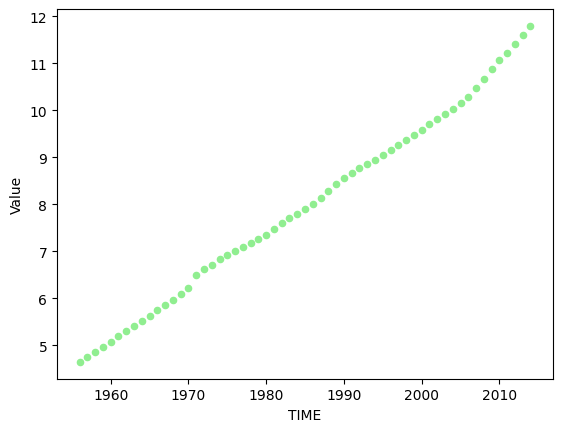

In [72]:
select2.plot(x="TIME", y="Value", kind="scatter", color="lightgreen")

In [64]:
model_pop = LinearRegression()
model_pop.fit(select2["TIME"].values.reshape(-1, 1), select2["Value"])

LinearRegression()

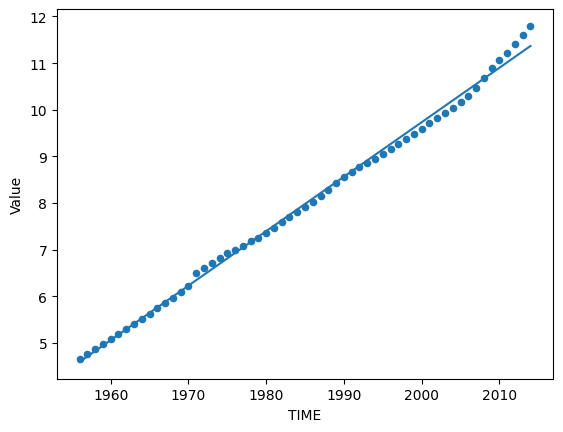

In [70]:
select2.plot(x="TIME", y="Value", kind="scatter")
plt.plot(select2["TIME"].values.reshape(-1,1), model_pop.predict(select2["TIME"].values.reshape(-1,1)))

In [73]:
from statsmodels.formula.api import ols

In [75]:
statsmodel_pop = ols("TIME ~ Value", data = select2).fit()
statsmodel_pop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   TIME   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.525e+04
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           6.24e-71
Time:                        11:14:25   Log-Likelihood:                -85.982
No. Observations:                  59   AIC:                             176.0
Df Residuals:                      57   BIC:                             180.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1916.9073      0.568   3373.087      0.000    1915.769    1918.045
Value          8.5314      0.069    123.496      0.000       8.393       8.670
==============================================================================
Omnibus:                       16.461   Durbin-Watson:                   0.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.019
Skew:                          -1.142   Prob(JB):                     4.50e-05
Kurtosis:                       4.712   Cond. No.                         34.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
import numpy as np

In [80]:
select3 = select2[["TIME", "Value"]]
print(select3)

     TIME      Value
176  1956   4.650000
177  1957   4.758000
178  1958   4.866000
179  1959   4.976000
180  1960   5.082700
181  1961   5.195900
182  1962   5.301300
183  1963   5.407000
184  1964   5.516400
185  1965   5.626400
186  1966   5.757910
187  1967   5.859757
188  1968   5.965400
189  1969   6.092823
190  1970   6.215372
191  1971   6.499329
192  1972   6.618511
193  1973   6.721690
194  1974   6.832903
195  1975   6.923814
196  1976   7.001049
197  1977   7.087532
198  1978   7.177962
199  1979   7.261967
200  1980   7.357296
201  1981   7.474993
202  1982   7.603333
203  1983   7.707126
204  1984   7.801179
205  1985   7.905584
206  1986   8.018163
207  1987   8.145619
208  1988   8.283219
209  1989   8.426827
210  1990   8.553859
211  1991   8.668627
212  1992   8.770000
213  1993   8.853000
214  1994   8.942000
215  1995   9.044000
216  1996   9.159000
217  1997   9.267000
218  1998   9.364000
219  1999   9.472000
220  2000   9.585000
221  2001   9.713000
222  2002   9

In [89]:
log_select3 = np.log(select3)

In [99]:
xlog = np.log(select3["TIME"])
ylog = np.log(select3["Value"])

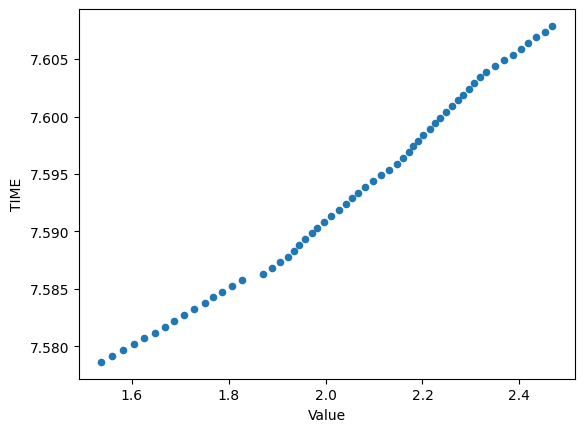

In [103]:
log_select3.plot(x="Value", y="TIME", kind="scatter")
plt.show()

In [104]:
model_pop2 = LinearRegression()
model_pop2.fit(log_select3["TIME"].values.reshape(-1, 1), log_select3["Value"])

LinearRegression()

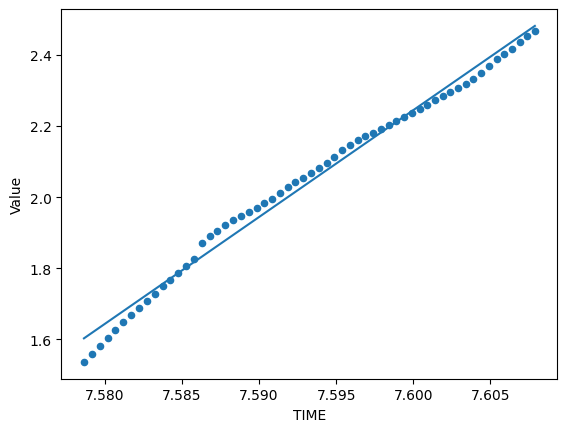

In [105]:
log_select3.plot(x="TIME", y="Value", kind="scatter")
plt.plot(log_select3["TIME"].values.reshape(-1,1), model_pop2.predict(log_select3["TIME"].values.reshape(-1,1)))
plt.show()

In [106]:
model_pop2 = ols("TIME ~ Value", data=log_select3).fit()
model_pop2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   TIME   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     5025.
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           2.79e-57
Time:                        11:31:09   Log-Likelihood:                 329.49
No. Observations:                  59   AIC:                            -655.0
Df Residuals:                      57   BIC:                            -650.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.5261      0.001   7869.820      0.000       7.524       7.528
Value          0.0329      0.000     70.887      0.000       0.032       0.034
==============================================================================
Omnibus:                        7.816   Durbin-Watson:                   0.037
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                2.708
Skew:                           0.092   Prob(JB):                        0.258
Kurtosis:                       1.967   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""